In [1]:
import sklearn.ensemble as ensemble
import pandas as pd
import numpy as np
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
data = pd.read_csv("H:\python\stackoverflow.csv", encoding = 'latin1')

In [3]:
data = data.drop(['    '],axis = 1)

In [4]:
data.columns

Index(['RespondentID', 'Country', 'Salary', 'YearsCodedJob', 'OpenSource',
       'Hobby', 'CompanySizeNumber', 'Remote', 'CareerSatisfaction',
       'Datascientist', 'Database administrator',
       'Desktop applications developer',
       'Developer with stats/math background', 'DevOps', 'Embedded developer',
       'Graphic designer', 'Graphics programming',
       'Machine learning specialist', 'Mobile developer',
       'Quality assurance engineer', 'Systems administrator', 'Web developer'],
      dtype='object')

In [5]:
data['CompanySizeNumber'] = data['CompanySizeNumber'].fillna('new')
#filling NAN values with the median

In [6]:
data=pd.get_dummies(data)
data.head(5)

,RespondentID,Salary,YearsCodedJob,OpenSource,Hobby,CareerSatisfaction,Datascientist,Database administrator,Desktop applications developer,Developer with stats/math background,...,CompanySizeNumber_10.0,CompanySizeNumber_20.0,CompanySizeNumber_100.0,CompanySizeNumber_500.0,CompanySizeNumber_1000.0,CompanySizeNumber_5000.0,CompanySizeNumber_10000.0,CompanySizeNumber_new,Remote_Not remote,Remote_Remote
0,3,113750.0,20,1,1,8,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,15,100000.0,20,0,1,8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,18,130000.0,20,1,1,9,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,19,82500.0,3,0,1,5,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,26,175000.0,16,0,1,7,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [7]:
data1 = data.drop(['CompanySizeNumber_new'],axis = 1)

In [8]:
data1['Salary'] = data1['Salary'].astype(np.int64)
#data['CompanySizeNumber'] = data['CompanySizeNumber'].astype(np.int64)

In [9]:
y=data1['Salary']
x=data1.drop(['Salary'],axis=1)
data1.head(5)

,RespondentID,Salary,YearsCodedJob,OpenSource,Hobby,CareerSatisfaction,Datascientist,Database administrator,Desktop applications developer,Developer with stats/math background,...,CompanySizeNumber_1.0,CompanySizeNumber_10.0,CompanySizeNumber_20.0,CompanySizeNumber_100.0,CompanySizeNumber_500.0,CompanySizeNumber_1000.0,CompanySizeNumber_5000.0,CompanySizeNumber_10000.0,Remote_Not remote,Remote_Remote
0,3,113750,20,1,1,8,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,15,100000,20,0,1,8,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,18,130000,20,1,1,9,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,19,82500,3,0,1,5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,26,175000,16,0,1,7,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [10]:
data1['Salary'] = data1['Salary'].astype(np.int64)
#data['CompanySizeNumber'] = data['CompanySizeNumber'].astype(np.int64)

In [30]:
import sklearn.model_selection as ms
import sklearn.tree as tree
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.2,random_state=200)

In [32]:
clf = GradientBoostingRegressor(n_estimators=20,random_state = 400)

In [33]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=400, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
clf.score(x_test,y_test)

0.6281939980417184

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
mod = GridSearchCV(clf,param_grid= {'n_estimators':[60,100,160,200,260,300,340]})

In [37]:
mod.fit(x_train,y_train)

C:\Users\SHASHANK S\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...e=400, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60, 100, 160, 200, 260, 300, 340]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
mod.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=400, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
clf = GradientBoostingRegressor(n_estimators=100,random_state = 400)
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=400, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
clf.score(x_test,y_test)

0.6631495913422385

In [46]:
clf.feature_importances_

array([9.75381111e-03, 2.10795925e-01, 3.20089246e-03, 1.42375754e-04,
       1.20786731e-02, 1.32734277e-03, 5.75603041e-03, 5.80071225e-03,
       1.89838671e-03, 2.66475651e-03, 4.24992320e-05, 2.51969037e-03,
       1.43340975e-04, 2.56058277e-03, 3.83178348e-04, 4.77810978e-04,
       2.85923629e-03, 4.84260270e-03, 1.70014454e-03, 6.83902979e-04,
       1.23554086e-01, 1.18901953e-04, 5.82981939e-01, 5.63402833e-03,
       2.73914040e-03, 1.90477837e-03, 3.01709087e-05, 1.53886220e-04,
       3.37252623e-04, 1.94317715e-04, 1.08151781e-02, 1.39305456e-03,
       5.11371053e-04])

In [47]:
feature_imp = pd.Series(clf.feature_importances_,index = x.columns)
feature_imp.sort_values(ascending = False)

Country_United States                   0.582982
YearsCodedJob                           0.210796
Country_India                           0.123554
CareerSatisfaction                      0.012079
CompanySizeNumber_10000.0               0.010815
RespondentID                            0.009754
Desktop applications developer          0.005801
Database administrator                  0.005756
CompanySizeNumber_1.0                   0.005634
Web developer                           0.004843
OpenSource                              0.003201
Systems administrator                   0.002859
CompanySizeNumber_10.0                  0.002739
DevOps                                  0.002665
Machine learning specialist             0.002561
Graphic designer                        0.002520
CompanySizeNumber_20.0                  0.001905
Developer with stats/math background    0.001898
Country_Canada                          0.001700
Remote_Not remote                       0.001393
Datascientist       

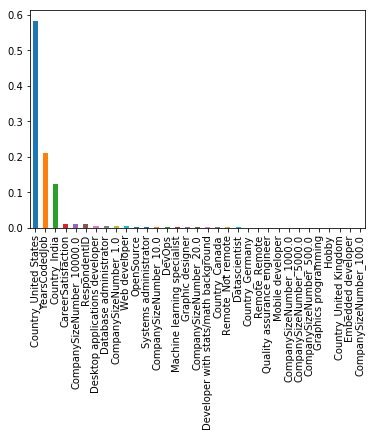

In [57]:
graph = feature_imp.sort_values(ascending = False).plot(kind = 'bar')

In [59]:
%matplotlib inline
graph

In [60]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

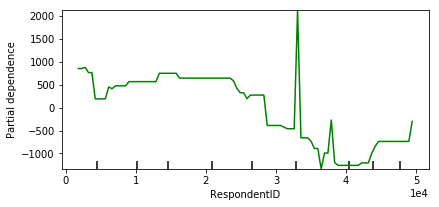

In [63]:
fig,axs = plot_partial_dependence(clf,x,[0],feature_names = x.columns.tolist())